In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns=["class"])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

In [4]:
model = RandomForestClassifier(n_estimators=100, max_depth=4)

In [5]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [6]:
model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [7]:
model.score(X_test, y_test)

0.9

In [9]:
importances = model.feature_importances_

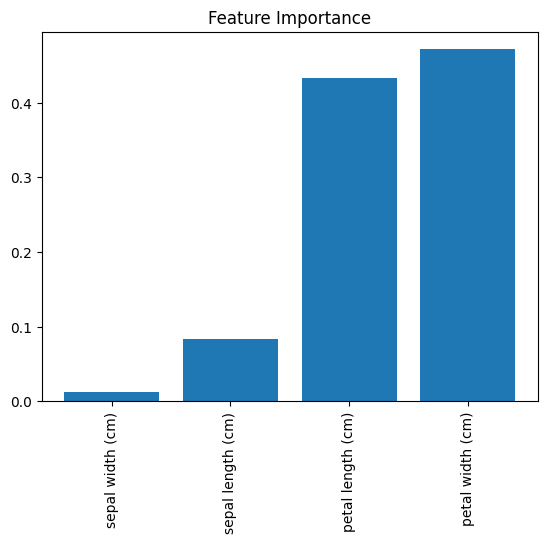

In [10]:
indices_sorted = np.argsort(importances)

plt.title('Feature Importance')
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(indices_sorted)), X.columns[indices_sorted], rotation=90)
plt.show()

In [11]:
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=100)

In [12]:
model2.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [13]:
model2.predict(X_test)

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 2])

In [14]:
model2.score(X_test, y_test)

0.9

In [16]:
importance2 = model2.feature_importances_

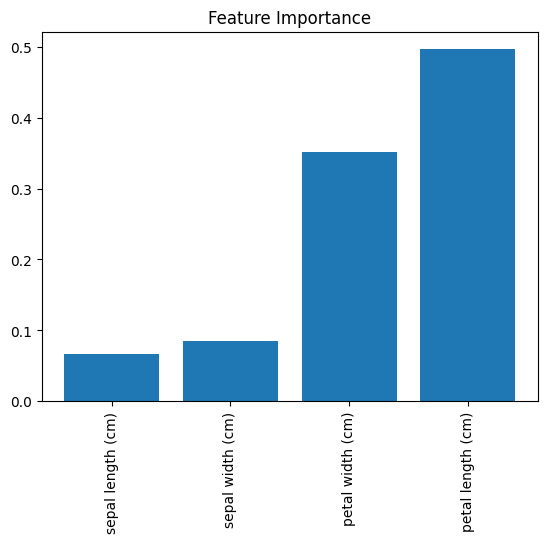

In [17]:
indices_sorted = np.argsort(importance2)

plt.title('Feature Importance')
plt.bar(range(len(importance2)), importance2[indices_sorted])
plt.xticks(range(len(indices_sorted)), X.columns[indices_sorted], rotation=90)
plt.show()

# 차원 축소

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
user = pd.read_csv('/content/drive/MyDrive/study/data/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


In [20]:
# user = user.drop('children', axis=1)
# user.head(10)

,recency,age,spent_all,purchase_num_all,family_size
0,58,66,1617,25,1
1,38,69,27,6,3
2,26,58,776,21,2
3,26,39,53,8,3
4,94,42,422,19,3
5,16,56,716,22,3
6,34,52,590,21,2
7,32,38,169,10,3
8,19,49,46,6,3
9,68,73,49,2,4


In [29]:
user_mean = user.mean()
user_std = user.std()
scaled_df = (user - user_mean) / user_std

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [31]:
pca.fit(scaled_df)
scaled_df_pca = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pca)

pca_df.columns = ['PC1', 'PC2']

pca_df.head()

,PC1,PC2
0,3.043476,0.646301
1,-1.926976,0.528713
2,1.501383,-0.117994
3,-1.168100,-1.373146
4,-0.226542,-0.077045


<Axes: xlabel='PC1', ylabel='PC2'>

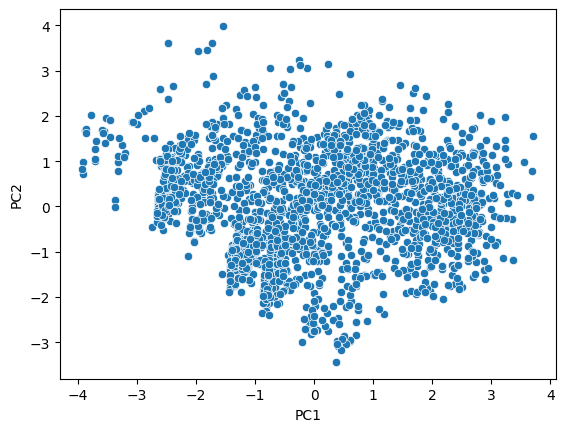

In [32]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2')

In [34]:
pca = PCA(n_components=6)
pca.fit(scaled_df)
scaled_df_pca = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pca)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.043476,0.646301,0.249843,0.704499,-0.066913,0.376684
1,-1.926976,0.528713,-0.431355,1.255031,0.085687,0.642017
2,1.501383,-0.117994,-0.800846,0.379732,-0.367393,-0.553751
3,-1.168100,-1.373146,-0.668054,-0.608071,0.036437,-0.285106
4,-0.226542,-0.077045,1.553274,-1.107927,-0.463466,-0.381861


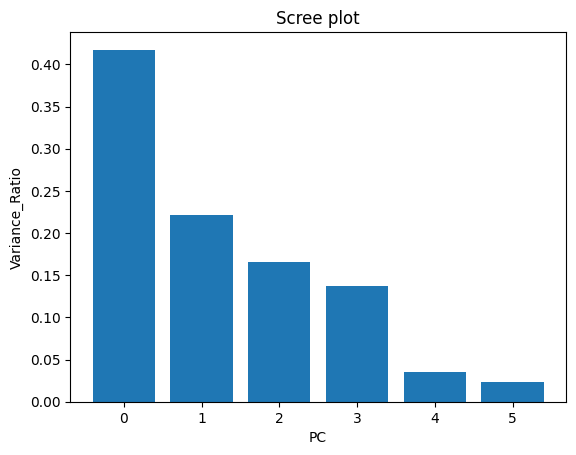

In [36]:
import numpy as np
import matplotlib.pyplot as plt

num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_

plt.bar(x, var)
plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')
plt.show()

In [37]:
cum_var = np.cumsum(var)        # 누적 분산비육 구하기
cum_vars = pd.DataFrame({'cum_var': cum_var}, index = pca_df.columns)

cum_vars

,cum_var
PC1,0.417326
PC2,0.638633
PC3,0.804805
PC4,0.941612
PC5,0.976473
PC6,1.000000


결과를 확인하니 3개의 주성분(PC1, PC2, PC3)이 있을 때 전체 주성분이 데이터를 설명하는 정도 대비 약 80% 정도를 설명하는 것으로 나옵니다. 즉, 해당 경우에는 주성분을 3개로 차원을 축소하는 게 적절하다고 할 수 있죠.